In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import datetime as dt
from tqdm import tqdm_notebook

In [2]:
# 마이너스 깨짐 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 지수 표현 설정
pd.options.display.float_format = '{:.5f}'.format

### 데이터 불러오기

In [123]:
youtube = pd.read_csv('항공+코로나-스포츠_관련성순.csv')
youtube.head(3)

,viewCount,likeCount,favoriteCount,commentCount,key,title,channel,url,date
0,4826,35.00000,0,17.00000,항공 +코로나 -스포츠,&quot;다시 하늘 날고 싶어요&quot;...코로나 1년 벼랑 끝 항공산업 / YTN,YTN,https://www.youtube.com/watch?v=L-0_i8hiZbY,2021-01-19
1,40679,453.00000,0,32.00000,항공 +코로나 -스포츠,"[다큐온] ✈️국내 공항과 항공, 여행업계의 새로운 도전의 현장 &quot;코로나를...",KBS 다큐,https://www.youtube.com/watch?v=SPNXUaSEfMU,2021-12-03
2,7578,90.00000,0,4.00000,항공 +코로나 -스포츠,코로나19의 직격타를 맞은 항공업계의 현황과 향후 전망 🛫,JOB+채용,https://www.youtube.com/watch?v=iX0cxWiSJ9M,2021-03-05


In [124]:
stock_list = pd.DataFrame({'name': ['대한항공','제주항공','진에어','에어부산'], 'Ticker' :['003490','089590','272450','298690']})

In [125]:
stock_change = pd.DataFrame()
stock_close = pd.DataFrame()
stock_volume = pd.DataFrame()
for i in range(stock_list.shape[0]):
    stock = fdr.DataReader(stock_list.Ticker[i], start='2020-01-01', end='2022-12-31')[['Close','Change','Volume']].reset_index()
    stock_close[stock_list.name[i]] = stock['Close']
    stock_change[stock_list.name[i]] = stock['Change']
    stock_volume[stock_list.name[i]] = stock['Volume']
stock_close.set_index(stock['Date'], inplace=True)
stock_change.set_index(stock['Date'], inplace=True)
stock_volume.set_index(stock['Date'], inplace=True)

In [126]:
stock_close.head(3)

,대한항공,제주항공,진에어,에어부산
Date,,,,
2020-01-02,18058,20687,13289,11350
2020-01-03,17701,20304,13246,11488
2020-01-06,17183,19387,12856,10975


In [127]:
stock_change.head(3)

,대한항공,제주항공,진에어,에어부산
Date,,,,
2020-01-02,-0.02284,0.00932,0.00000,-0.02366
2020-01-03,-0.01977,-0.01851,-0.00324,0.01216
2020-01-06,-0.02926,-0.04516,-0.02944,-0.04466


In [128]:
stock_volume.head(3)

,대한항공,제주항공,진에어,에어부산
Date,,,,
2020-01-02,303459,70589,100738,306236
2020-01-03,572272,329080,132958,222202
2020-01-06,690224,262226,577988,317740


### 데이터 확인

In [129]:
youtube.info()
# likeCount, commentCount - 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   viewCount      592 non-null    int64  
 1   likeCount      578 non-null    float64
 2   favoriteCount  592 non-null    int64  
 3   commentCount   582 non-null    float64
 4   key            592 non-null    object 
 5   title          592 non-null    object 
 6   channel        592 non-null    object 
 7   url            592 non-null    object 
 8   date           592 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 41.8+ KB


In [130]:
stock_close.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대한항공    742 non-null    int64
 1   제주항공    742 non-null    int64
 2   진에어     742 non-null    int64
 3   에어부산    742 non-null    int64
dtypes: int64(4)
memory usage: 29.0 KB


In [131]:
stock_change.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대한항공    742 non-null    float64
 1   제주항공    742 non-null    float64
 2   진에어     742 non-null    float64
 3   에어부산    742 non-null    float64
dtypes: float64(4)
memory usage: 29.0 KB


In [132]:
stock_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대한항공    742 non-null    int64
 1   제주항공    742 non-null    int64
 2   진에어     742 non-null    int64
 3   에어부산    742 non-null    int64
dtypes: int64(4)
memory usage: 29.0 KB


### 결측치 처리

In [133]:
youtube.isnull().sum()

viewCount         0
likeCount        14
favoriteCount     0
commentCount     10
key               0
title             0
channel           0
url               0
date              0
dtype: int64

In [134]:
youtube['favoriteCount'].value_counts() # 0만 존재

0    592
Name: favoriteCount, dtype: int64

In [135]:
youtube[youtube['likeCount'].isnull()]
# likeCount만 사용

,viewCount,likeCount,favoriteCount,commentCount,key,title,channel,url,date
86,6070,NaN,0,21.00000,항공 +코로나 -스포츠,대한민국공군의 코로나19 백신 첫 항공 수송!,대한민국공군,https://www.youtube.com/watch?v=psdsNUKkDJI,2021-03-02
130,1113,NaN,0,0.00000,항공 +코로나 -스포츠,코로나 4차유행 확산…하반기 항공 업계는? #아시아나항공 #티웨이항공 #엄경아 연구...,토마토증권통 TomatoTV,https://www.youtube.com/watch?v=Hi35kmEBGjw,2021-07-28
209,129,NaN,0,0.00000,항공 +코로나 -스포츠,[토마토TV 연결고리] 코로나에도 항공 부품기업은 가파른 경기 회복..국내 관련주는...,토마토증권통 TomatoTV,https://www.youtube.com/watch?v=7rYcSLxueRA,2021-08-13
268,570,NaN,0,0.00000,항공 +코로나 -스포츠,항공정비사의 포스트 코로나 준비,Jason Park,https://www.youtube.com/watch?v=J-Jm2P22q30,2020-06-30
308,374,NaN,0,NaN,항공 +코로나 -스포츠,"급등주 - 대한항공우, 항공, 여행, 코로나, 실적, 주식투자, 삼성전자, 재테크,...",평택촌놈TV,https://www.youtube.com/watch?v=oxXiLA5IbeM,2022-11-04
434,5531,NaN,0,14.00000,항공 +코로나 -스포츠,코스모 스위트 2.0 체험기 l 코로나 뚫고 한국가요 🥺 대한항공 퍼스트 클래스 타...,jj l,https://www.youtube.com/watch?v=-bnoFLAs4zE,2020-08-30
487,11919,NaN,0,53.00000,항공 +코로나 -스포츠,괌일상 VLOG 🇺🇸🇬🇺 | 대한항공 일등석 타고 괌으로! 22개월 아기와 심장 쫄...,몽몽 mongmong,https://www.youtube.com/watch?v=0hFi0TPmCrE,2021-09-01
491,82,NaN,0,0.00000,항공 +코로나 -스포츠,대한항공 하나투어 모두투어 참좋은여행 이제는 위드코로나 #여행주 #metaverse...,JM TV,https://www.youtube.com/watch?v=qLo6dUM7rTE,2022-11-01
532,33,NaN,0,0.00000,항공 +코로나 -스포츠,[무료 급등주 주식 종목 추천] 12월 21일 무료추천주 내일 시초가 부터 10배 ...,차트마법사 - 주식영웅,https://www.youtube.com/watch?v=qJo1Fvg5CGs,2022-12-20
536,40,NaN,0,0.00000,항공 +코로나 -스포츠,[무료 급등주 주식 종목 추천] 12월 21일 무료추천주 내일 시초가 부터 무조건 ...,차트마법사 - 주식영웅,https://www.youtube.com/watch?v=33QbRwLD9eI,2022-12-20


In [136]:
# favoriteCount 컬럼 drop
youtube.drop('favoriteCount',axis=1,inplace=True)
youtube.head(1)

,viewCount,likeCount,commentCount,key,title,channel,url,date
0,4826,35.00000,17.00000,항공 +코로나 -스포츠,&quot;다시 하늘 날고 싶어요&quot;...코로나 1년 벼랑 끝 항공산업 / YTN,YTN,https://www.youtube.com/watch?v=L-0_i8hiZbY,2021-01-19


In [137]:
youtube[youtube['commentCount'].isnull()]
# 대부분 댓글 사용 중지된 영상 - 0개로 처리

,viewCount,likeCount,commentCount,key,title,channel,url,date
180,689,13.00000,NaN,항공 +코로나 -스포츠,"대한항공(003490) 코로나 이후, 수혜 가능 커",토마토증권통 TomatoTV,https://www.youtube.com/watch?v=iZrbxQGuY4U,2020-11-17
256,8326,114.00000,NaN,항공 +코로나 -스포츠,[대한항공 뉴스룸] 우리는 &#39;연결&#39;합니다.,대한항공 뉴스룸,https://www.youtube.com/watch?v=eGllPlGBsw8,2020-05-19
297,6347,192.00000,NaN,항공 +코로나 -스포츠,[수익극대화 포트전략 이창원] 위드 코로나 대장 아시아나항공! 일진다이아 대응!,MBN골드,https://www.youtube.com/watch?v=qw2wMNB23e0,2021-08-24
300,6347,192.00000,NaN,항공 +코로나 -스포츠,[수익극대화 포트전략 이창원] 위드 코로나 대장 아시아나항공! 일진다이아 대응!,MBN골드,https://www.youtube.com/watch?v=qw2wMNB23e0,2021-08-24
308,374,NaN,NaN,항공 +코로나 -스포츠,"급등주 - 대한항공우, 항공, 여행, 코로나, 실적, 주식투자, 삼성전자, 재테크,...",평택촌놈TV,https://www.youtube.com/watch?v=oxXiLA5IbeM,2022-11-04
414,430,27.00000,NaN,항공 +코로나 -스포츠,대한항공 / 파버나인 / 지니뮤직 / 마이크로디지탈 / 여행주 / 코로나 / 항공주...,오공주차트룸,https://www.youtube.com/watch?v=GPno_1I2AWA,2021-05-24
425,275,9.00000,NaN,항공 +코로나 -스포츠,[제주항공] 위드코로나 기대/항공주 기술적 반등!? 과감한 매도가 수익을 만든다,영스톡,https://www.youtube.com/watch?v=bbUu_37RYTY,2022-02-08
446,1114,44.00000,NaN,항공 +코로나 -스포츠,한국공항 코로나 백신효과로 항공지상 조업수요 회복 및 대한항공 아시아나항공 합병 효...,태린이아빠,https://www.youtube.com/watch?v=7KorBKBweDA,2021-06-01
478,256,8.00000,NaN,항공 +코로나 -스포츠,"[대한항공 주가] 위드코로나 대장주 자리매김, 탄소중립 항공유 도입 긍정적 #대한항...",더블유경제TV,https://www.youtube.com/watch?v=ysbyDwjFtZo,2021-09-14
496,48605,1183.00000,NaN,항공 +코로나 -스포츠,베트남 코로나 확진자 85명 이제는 걷잡을수 없나?베트남 항공은 왜 환불 안해줘?(...,CONG TUBE 2020,https://www.youtube.com/watch?v=2EGHXzla90w,2020-03-20


In [138]:
youtube = youtube.fillna(0)
youtube[youtube['commentCount'].isnull()] # 결측치 - 0으로 대체

,viewCount,likeCount,commentCount,key,title,channel,url,date


In [139]:
youtube['date'] = pd.to_datetime(youtube['date'])

In [141]:
# 일자별로 그룹화
youtube_date = youtube.groupby(by='date').sum()
youtube_date['num_video'] = youtube.groupby(by='date').size()
youtube_date.head(3)

,viewCount,likeCount,commentCount,num_video
date,,,,
2020-01-22,854,4.00000,5.00000,1
2020-01-29,90,3.00000,0.00000,1
2020-02-01,1144,12.00000,4.00000,2


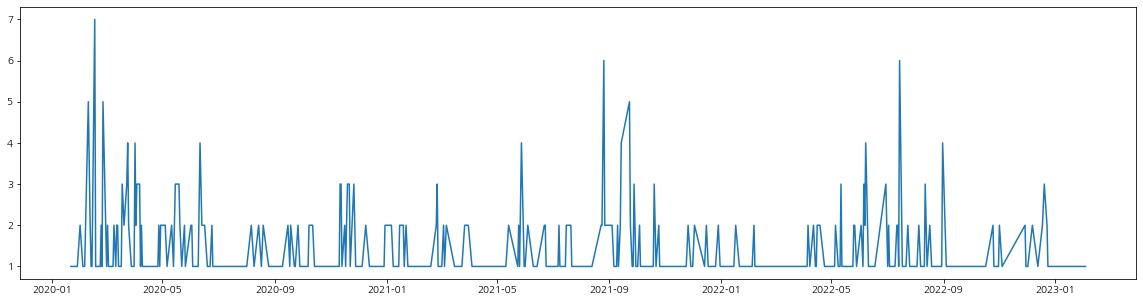

In [143]:
plt.figure(figsize=(20,5))
plt.plot(youtube_date['num_video'])
plt.show()

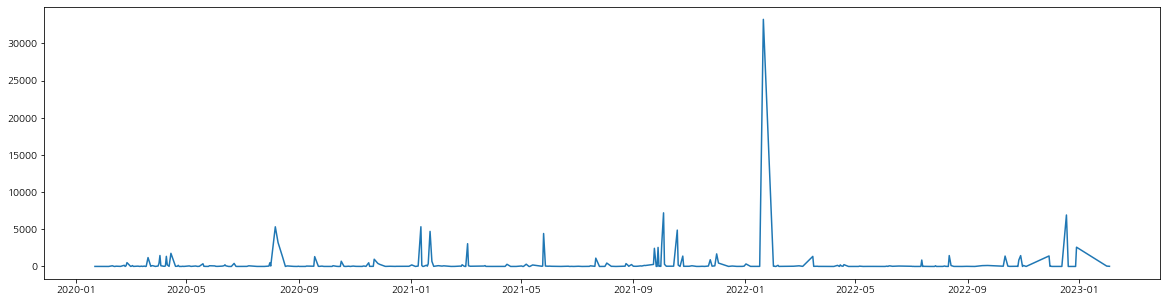

In [144]:
plt.figure(figsize=(20,5))
plt.plot(youtube_date['likeCount'])
plt.show()

### 유튜브 데이터 결측치 보간

- 주가 데이터를 기준으로 유튜브 데이터가 없는 날짜는 사람들의 관심도가 영상이 올라온 이후로 점차 선형적으로 증감한다고 가정하여 선형 보간법을 활용해 결측치 보간

In [145]:
import scipy.interpolate as spi

In [146]:
len(youtube_date) # 406일치 데이터

410

In [147]:
len(stock_close) # 742일치 데이터

742

In [148]:
youtube_date = youtube_date.reset_index()
youtube_date

,date,viewCount,likeCount,commentCount,num_video
0,2020-01-22,854,4.00000,5.00000,1
1,2020-01-29,90,3.00000,0.00000,1
2,2020-02-01,1144,12.00000,4.00000,2
3,2020-02-04,236,0.00000,0.00000,1
4,2020-02-06,239,0.00000,0.00000,1
...,...,...,...,...,...
405,2022-12-26,225,4.00000,0.00000,1
406,2022-12-28,30,0.00000,0.00000,1
407,2022-12-29,513123,2591.00000,1615.00000,1
408,2023-01-31,765,47.00000,3.00000,1


In [149]:
youtube_date.rename(columns={'date':'Date'}, inplace=True)

In [150]:
stock_close = stock_close.reset_index() # 데이터 병합을 위해 날짜 데이터 열로 만들기

In [151]:
youtube_null = pd.merge(left=stock_close, right=youtube_date, how='left')[['Date','viewCount','likeCount','commentCount','num_video']]
youtube_null.head(3)

,Date,viewCount,likeCount,commentCount,num_video
0,2020-01-02,NaN,NaN,NaN,NaN
1,2020-01-03,NaN,NaN,NaN,NaN
2,2020-01-06,NaN,NaN,NaN,NaN


In [152]:
youtube_null[23:30]

,Date,viewCount,likeCount,commentCount,num_video
23,2020-02-06,239.00000,0.00000,0.00000,1.00000
24,2020-02-07,NaN,NaN,NaN,NaN
25,2020-02-10,7350.00000,87.00000,6.00000,5.00000
26,2020-02-11,NaN,NaN,NaN,NaN
27,2020-02-12,138.00000,3.00000,0.00000,2.00000
28,2020-02-13,714.00000,3.00000,6.00000,1.00000
29,2020-02-14,2905.00000,34.00000,18.00000,1.00000


In [153]:
youtube_linear = youtube_null.interpolate()
youtube_linear[23:30] # 위 데이터와 비교했을 때 결측치가 평균값으로 채워진 것을 확인할 수 있음

,Date,viewCount,likeCount,commentCount,num_video
23,2020-02-06,239.00000,0.00000,0.00000,1.00000
24,2020-02-07,3794.50000,43.50000,3.00000,3.00000
25,2020-02-10,7350.00000,87.00000,6.00000,5.00000
26,2020-02-11,3744.00000,45.00000,3.00000,3.50000
27,2020-02-12,138.00000,3.00000,0.00000,2.00000
28,2020-02-13,714.00000,3.00000,6.00000,1.00000
29,2020-02-14,2905.00000,34.00000,18.00000,1.00000


In [154]:
len(youtube_linear)

742

In [155]:
# 초기 데이터는 이전 데이터가 존재하지 않아 결측치 보간이 어렵기 때문에 제거하기로 함
youtube_linear = youtube_linear.dropna()
len(youtube_linear) # 24개 제거

728

### 최종 데이터

- 상관성 분석을 위해 주가 데이터와 유튜브 데이터 병합
- 유튜브 데이터의 경우 조회수,좋아요수,댓글수를 모두 합해 youtube_performance 변수 생성

In [156]:
youtube_linear['youtube_performance'] = youtube_linear.viewCount + youtube_linear.likeCount + youtube_linear.commentCount
youtube_linear = youtube_linear.drop(['viewCount','likeCount','commentCount'], axis=1)

In [159]:
youtube_linear.head(3)

,Date,num_video,youtube_performance
14,2020-01-22,1.00000,863.00000
15,2020-01-23,1.00000,606.33333
16,2020-01-28,1.00000,349.66667


In [163]:
youtube_change = pd.merge(left=stock_change, right=youtube_linear, how='inner', on='Date')
display(youtube_change.head(3))
print(len(youtube_change))

,Date,대한항공,제주항공,진에어,에어부산,num_video,youtube_performance
0,2020-01-22,0.01339,-0.01235,-0.00328,-0.00537,1.00000,863.00000
1,2020-01-23,-0.04149,-0.02496,-0.01293,-0.00568,1.00000,606.33333
2,2020-01-28,-0.06691,-0.07678,-0.09210,-0.03306,1.00000,349.66667


728


In [113]:
youtube_close = pd.merge(left=stock_close, right=youtube_linear, how='inner', on='Date')
display(youtube_close.head(3))
print(len(youtube_close))

,Date,대한항공,제주항공,진에어,에어부산,num_video,youtube_performance
0,2020-02-06,17508,17934,13116,10561,1.00000,239.00000
1,2020-02-07,17442,17666,13116,10481,3.00000,3841.00000
2,2020-02-10,17053,17743,12986,10283,5.00000,7443.00000


719


In [114]:
youtube_volume = pd.merge(left=stock_volume, right=youtube_linear, how='inner', on='Date')
display(youtube_volume.head(3))
print(len(youtube_volume))

,Date,대한항공,제주항공,진에어,에어부산,num_video,youtube_performance
0,2020-02-06,1240187,107302,91872,100884,1.00000,239.00000
1,2020-02-07,796200,71077,74477,103753,3.00000,3841.00000
2,2020-02-10,754365,66307,136370,75107,5.00000,7443.00000


719


### 상관성 분석

In [115]:
display(stock_change.corr())
display(stock_close.corr())
display(stock_volume.corr())

,대한항공,제주항공,진에어,에어부산
대한항공,1.00000,0.69274,0.70092,0.60049
제주항공,0.69274,1.00000,0.76806,0.53336
진에어,0.70092,0.76806,1.00000,0.53282
에어부산,0.60049,0.53336,0.53282,1.00000


,대한항공,제주항공,진에어,에어부산
대한항공,1.00000,0.68676,0.93575,-0.20286
제주항공,0.68676,1.00000,0.81197,0.41870
진에어,0.93575,0.81197,1.00000,-0.04466
에어부산,-0.20286,0.41870,-0.04466,1.00000


,대한항공,제주항공,진에어,에어부산
대한항공,1.00000,0.52857,0.32199,0.50421
제주항공,0.52857,1.00000,0.26057,0.34139
진에어,0.32199,0.26057,1.00000,0.16720
에어부산,0.50421,0.34139,0.16720,1.00000


**유튜브-등락률 상관관계**

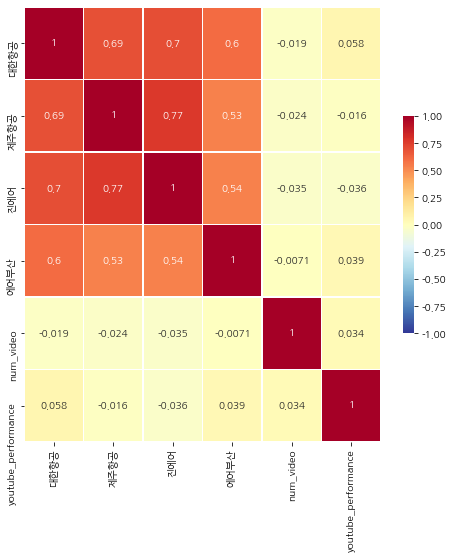

In [119]:
change_corr = youtube_change.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(8,8))

# 히트맵을 그린다
sns.heatmap(change_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**등락률의 경우 네 종목 모두 큰 상관관계가 없음**

**유튜브-종가 상관관계**

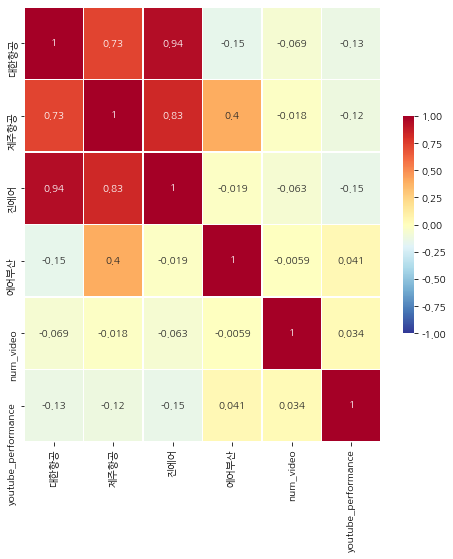

In [117]:
close_corr = youtube_close.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(8,8) )

# 히트맵을 그린다
sns.heatmap(close_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**종가의 경우 대한항공, 제주항공, 진에어의 경우 유튜브 반응과 약간의 음의 상관관계가 있지만 그 정도가 크지 않음**

#### 유튜브-거래량 상관관계

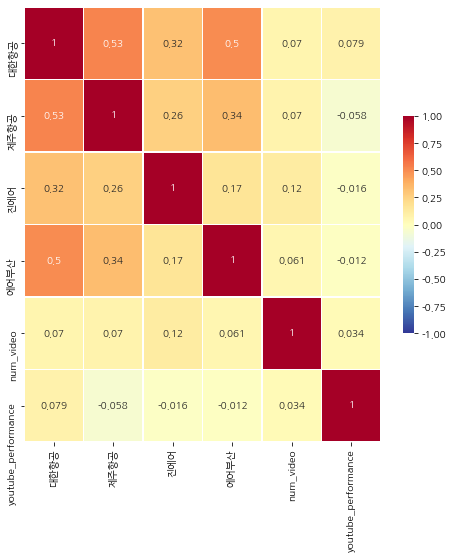

In [118]:
volume_corr = youtube_volume.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(8,8) )

# 히트맵을 그린다
sns.heatmap(volume_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**거래량의 경우 진에어만 유튜브 영상개수와 약간의 상관관계가 있음**